
# Table of Contents
1. [Introduction](##Introduction)
2. [Configuration](###Configuration)
3. [Questions](#Questions)
4. [Question #1: The producers](#Question-#1:-The-producers)
5. [Channel info](###Channel-info)
6. [Video info](###Video-info)
7. [Recommendations info](###Recommendations-info)
8. [Topics](###Topics)
9. [Question #2: The users](Question-#2:-The-users)
10. [Finding the hardcore commenters in the Dutch network](#Finding-the-hardcore-commenters-in-the-Dutch-network)
11. [Zooming in on a couple of persons of interest in the Dutch network](#Zooming-in-on-a-couple-of-persons-of-interest-in-the-Dutch-network)
12. [Dutch commenters on international channels](#Zooming-in-on-a-couple-of-persons-of-interest-in-the-Dutch-network)
14. [Look at the right-wing commenters* on left wing channels](#Look-at-the-right-wing-commenters*--on-left-wing-channels)
15. [TODO: Follow commenter journeys](#TODO:-Follow-commenter-journeys)
16. [Question #3: Comparisson](#Question-#3:-Comparisson)

## Introduction

This notebook is used for the analysis of information networks on YouTube and to make this analysis reproducable. I'll take you step by step through the data and analyses, trying to find angles for stories. You can use the Table of Contents to skip to the relevant parts.

A BIG TODO: make all variables more generic and reusable.

### Configuration

First do some configuration, import libraries and set paths to data. Throughout the Notebook, Python3.6 is used. I'll import all libraries at once.

In [1]:
import pandas as pd #basically the engine for the whole analysis. 
import matplotlib.pyplot as plt #for plotting our data.
import glob #a nice library for iterating through multiple files.
import networkx as nx #we need this to construct and export network graphs.
import seaborn as sns; sns.set() #for plotting
import csv #for reading and writing csv's when we are not using the pandas library.
import re
import sys

csv.field_size_limit(sys.maxsize)

%matplotlib inline

In [2]:
# Set path to NL data - better to set these constants in a separate config file and import them here.

path_nl = '/home/dim/Documents/projecten/extremisme/youtube/yt/YouTubeExtremism/DataCollection/output/NL/'

# Set path to control group data.

path_right = '/home/dim/Documents/projecten/extremisme/youtube/yt/YouTubeExtremism/DataCollection/output/right/'

# Set path to international right data

path_left = '/home/dim/Documents/projecten/extremisme/youtube/yt/YouTubeExtremism/DataCollection/output/left/'

# Questions

So we're all set up. Before we dive in, what kind of questions do we want to answer? 

1. What kind of content is being watched by Dutch viewers? (The producers)
2. Who is commenting on the videos in the far right information network? How are commenters interacting? (The users)
3. How do political parties compare in terms of content, marketing strategies and reach? (Comparisson and strategies)
4. How does the far right information network compare to other information networks (like far left and center)? (Whataboutism)
5. What content is harmful, hateful, or illegal, in other words, when are lines being crossed? (Morality, the Platform)


# Question #1: The producers

For this we need:
1. Statistics on videos, channels and recommendations.
2. Topics of videos (by tags or through topic modelling)

Let's start by looking at the channels.

### Channel info

Let's plot some channel data, like number of subscriptions and views over time. That will give us a sense of how certain channels are developing.

In [ ]:
# Import the channel data into a dataframe.

channels = pd.read_csv(path_nl + 'channels_nl_right.csv')

# Take a subset of the channel data.

stats = channels[['channel_title', 
                  'channel_description', 
                  'channel_subscribercount',
                  'channel_viewcount', 
                  'channel_videocount']]

stats = stats.sort_values(by='channel_subscribercount', ascending=False)
stats.set_index("channel_title",drop=True,inplace=True)

# Create matplotlib figure.

fig = plt.figure(figsize=(20,10)) 

# Create matplotlib axes.

ax = fig.add_subplot(111) 

# Create another axes that shares the same x-axis as ax.

ax2 = ax.twinx() 

# Set a width for a bar chart.

width = 0.4

# Configure the bar chart.

stats.channel_subscribercount.plot(kind='bar', color='red', ax=ax, width=width, position=1)
stats.channel_viewcount.plot(kind='bar', color='blue', ax=ax2, width=width, position=0, legend=True, grid=True)
ax.set_ylabel('subscribers')
ax2.set_ylabel('views')

plt.show()

Be careful, because there are two y-axis. The left is subscribers, the right is viewcount. 

That said though, there are some takeaways and questions:
1. PVVpers has 0 subscribers. That means that the subscribercount has not been given on the channel page. They have a lot of viewers. Still more than Forum voor Democratie, but FvD is catching up. PVV is much older.
2. Some channels generate a lot of views, like Laurens, Rafiek de Bruin, Leukste YouTube Fragmenten, Deweycheatumhowe and the LvKrijger. Most of them are very pro FvD and pro PVV.
3. FvD has relatively many subscribers (they rank 2nd), but not that many views (relitavely, they rank 4th). Did they buy subscribers? 
4. Why did Rossen remove all his videos? He was quite popular.
5. If we look at FvD more broadly and take affiliated channels into consideration, FvD is very big.

### Video info

In [ ]:
# Load videos.

videos = pd.read_csv(path_nl + 'videos_nl_right.csv')

In [ ]:
# Create a year column.

videos['video_upload_year'] = pd.DatetimeIndex(videos['video_published']).year

In [ ]:
# Plot views and uploads per year.

uploads_per_year = videos.groupby(['video_upload_year']).size()
views_per_year = videos.groupby(['video_upload_year'])['video_view_count'].agg('sum')

fig = plt.figure(figsize=(10,5)) # Create matplotlib figure

width = 0.4

uploads_per_year.plot(kind='bar', color='red', width=width, grid=True)
ax.set_ylabel('number of videos published')
ax.set_xlabel('year')

plt.show()

# First the uploads per year.

In [ ]:
fig = plt.figure(figsize=(10,5))
width = 0.4

views_per_year.plot(kind='bar', color='red', width=width, grid=True)
ax.set_ylabel('number of views')
ax.set_xlabel('year')

plt.show()

# Then the views per year.

Interesting:

1. In 2018 more videos were uploaded, but they've gotten significantly lesser views. It could be that older video's are still getting views. 

In [ ]:
# Let's compare some channels.

channel1 = 'Forum Democratie' #fill in the channels you want to compare
channel2 = 'PVVpers'

filtered = videos.loc[(videos['video_channel_title'] == channel1) | \
                      (videos['video_channel_title'] == channel2)
                     ]

In [ ]:
# First look at the number of published videos per year.

ax = filtered.groupby(['video_upload_year','video_channel_title'])['video_channel_title'] \
        .count().unstack(1).plot.bar(title="Number of uploaded videos", figsize=(10,5), grid=True)

ax.set_xlabel('year')
ax.set_ylabel('number of uploads')

plt.show()

In [ ]:
# Now look at the viewcount per year.

ax = filtered.groupby(['video_upload_year', 'video_channel_title'])['video_view_count'] \
        .sum().unstack(1).plot.bar(title="Number of views per year", figsize=(10,5), grid=True, legend=True)

ax.set_xlabel('year')
ax.set_ylabel('number of views')

plt.show()

In [ ]:
# And the comment count per year.

ax = filtered.groupby(['video_upload_year', 'video_channel_title'])['video_comment_count'] \
        .sum().unstack(1).plot.bar(title="Number of comments per year", figsize=(10,5), grid=True, legend=True)

ax.set_xlabel('year')
ax.set_ylabel('number of comments')

plt.show()

Some takeaways from the comparison of PVV and FvD:
1. FvD is winning on YouTube, by a large margin.
2. They are much more active in uploading content
3. That content reaches a larger audience. TODO: to be sure we need to look at the average views per video.
4. It's clear that there is much more debate, or at least more comments on FvD than on PVV.

In [ ]:
# Looking at the mean of viewcount per video

ax = filtered.groupby(['video_upload_year', 'video_channel_title'])['video_view_count'] \
        .mean().unstack(1).plot.bar(title="Number of views per year", figsize=(10,5), grid=True, legend=True)

ax.set_xlabel('year')
ax.set_ylabel('number of views')

plt.show()

I still want to have a good look at it, but it seems that the mean views per video is about the same. This could mean that FvD is simply uploading a lot more content, that doesn't gather many views, while PVV is uploading not so much content, but what is uploaded is peforming better. 

### Recommendations info

The channel data for the recommendations is missing, so we need to add them and merge them with the recommendations and the videos. While we are at it, let's use a simpler variable.

In [ ]:
# Load recommendations.

recommendations = pd.read_csv(path_nl + 'recommendations_nl_right.csv')

In [ ]:
# Normalize field names (this will be fixed in future versions of the DataCollection library)

recommendations = recommendations.rename(columns={'channelId':'channel_id',
                                                  'description': 'target_channel_description',
                                                  'publishedAt': 'target_video_published',
                                                  'targetVideoId': 'target_video_id',
                                                  'title': 'target_video_title',
                                                  'videoId': 'source_video_id' })

video_channels = pd.merge(videos, channels, on='channel_id', how='left')

video_channels = video_channels.rename(columns={'channel_id': 'source_channel_id',
                                                'video_category_id': 'source_video_category_id',
                                                'video_channel_title': 'source_channel_title',
                                                'video_description': 'source_video_description',
                                                'video_id': 'source_video_id',
                                                'video_published': 'source_video_published',
                                                'video_tags': 'source_video_tags',
                                                'video_title': 'source_video_title',
                                                'video_view_count': 'source_video_viewcount',
                                                'channel_topic_ids': 'source_channel_topic_ids',
                                                'channel_subscribercount': 'source_channel_subscribercount'})

recs_chans = pd.read_csv(path_nl + 'temp_data/recs_chans.csv')
recs_channels_for_merge = pd.merge(recommendations, recs_chans, on='channel_id', how='left')

recs_channels_for_merge = recs_channels_for_merge.rename(columns={'channel_id': 'target_channel_id',
                                                                 'channel_title': 'target_channel_title',
                                                                 'channel_description': 'target_channel_description',
                                                                 'channel_viewcount': 'target_channel_viewcount',
                                                                 'channel_subscribercount': 'target_channel_subscribercount',
                                                                 'channel_topic_ids': 'target_channel_topic_ids'})

recs = pd.merge(recs_channels_for_merge, video_channels, on='source_video_id', how='left')

recs = recs.drop(['channel_country_x',
                  'channel_default_language_x',
                  'channel_uploads_x',
                  'channel_commentcount_x',
                  'channel_videocount_x',
                  'channel_topic_categories_x',
                  'channel_branding_keywords_x',
                  'video_comment_count',
                  'video_default_language',
                  'video_dislikes_count',
                  'video_duration',
                  'video_likes_count',
                  'video_upload_year',
                  'channel_title',
                  'channel_viewcount',
                  'channel_country_y',
                  'channel_commentcount_y',
                  'channel_uploads_y',
                  'channel_viewcount',
                  'channel_branding_keywords_y',
                  'channel_topic_categories_y',
                  'channel_videocount_y',
                  'video_topic_categories',
                  'video_topic_ids',
                  'channel_default_language_y',
                  'channel_description'
                 ], axis=1)

recs = recs.rename(columns={'source_video_title_y': 'source_video_title'})


cols = ['source_video_id',
        'source_video_title',
        'source_video_description',
        'source_video_published',
        'source_video_tags',
        'source_video_viewcount',
        'source_channel_id',
        'source_video_category_id',
        'source_channel_title',
        'source_channel_subscribercount',
        'source_channel_topic_ids',
        'target_video_id',
        'target_video_title',
        'target_channel_id',
        'target_channel_description',
        'target_video_published',
        'target_channel_title',
        'target_channel_description',
        'target_channel_viewcount']

recs = recs[cols]
         
         

In [ ]:
# Let's look at a sample of the data.

recs.sample(5)

In [ ]:
# How many videos and recommendations are in this set?
len(recs)

In [ ]:
# A quick reminder of the channels.

recs.source_channel_title.unique()

In [ ]:
# Pick a channel

chan = 'Erkenbrand Kanaal' #fill in a channel here

#and filter

filtered_recs = recs[recs['source_channel_title'] == chan]

In [ ]:
# See the related channels of the videos and how often YouTube has assigned these related channels.

filtered_recs.target_channel_title.value_counts()

In [ ]:
# Write to gexf file, for analysis in Gephi.

G = nx.from_pandas_edgelist(recs, source='source_channel_title', target='target_channel_title')
nx.write_gexf(G, path + 'nl_graphs/nl_recommendations.gexf' )

In [ ]:
# Select a video from the selected channel.

vid = 'Conference interview with Millennial Woes [2018 ENGLISH]' #change this to another video title

filtered_rec_vids = filtered_recs[filtered_recs['source_video_title'] == vid]

In [ ]:
# You can pick another video of this list of videps of selected channel.

filtered_recs.source_video_title.unique()

In [ ]:
# YouTube thinks that these videos are related to the selected videos.

filtered_rec_vids.target_video_title.tolist()

### Topics

Get the topics from the videos. Still to do (see INT_analysis workbook)

## Question #2: The users

Who is commenting on the videos in the far right information network? How are commenters interacting? (The users)

In [3]:
# Load comment data

comments = pd.read_csv(path_nl + 'comments_nl_right.csv',
                        sep='¶',
                        quotechar='þ',
                        engine='python')

In [4]:
# How many comments do we have?

len(comments)

790416

### Finding the hardcore commenters in the Dutch network

First I'm interested in some statistics to get to the hardcore commenters

In [5]:
comments.columns

Index(['video_id', 'comment_id', 'author_display_name', 'author_channel_url',
       'author_channel_id', 'comment_text', 'comment_like_count',
       'comment_dislike_count', 'comment_time', 'reply_count'],
      dtype='object')

In [6]:
#number of unique author names

comments.author_display_name.nunique()

163201

In [7]:
#number of unique author id's

comments.author_channel_id.nunique()

171335

So we have to be a bit careful, because there are more unique id's than names, which is kind of obvious.

Let's start with adding more information to the comment data, so we can select and filter some channels. We can do this by adding the video data to the comment data.

In [8]:
videos = pd.read_csv(path_nl + 'videos_nl_right.csv')

In [9]:
nl_comment_sphere = pd.merge(comments, videos, on='video_id', how='left')

In [10]:
# Check if the merge was succesful.

len(nl_comment_sphere)

790426

In [11]:
# What are the available channels?

nl_comment_sphere.video_channel_title.value_counts()

Omroep PowNed                      455272
GeenStijl                           65891
Rafiek de Bruin                     44645
Forum Democratie                    30290
Cafe Weltschmerz                    26387
Paul Nielsen                        19938
Linkse Moskee                       15463
Laurens                             15378
Leukste YouTube fragmenten          15251
TheLvkrijger                        15140
LaVieJanRoos                        11060
Brave New World                     10010
Deweycheatumnhowe                    9995
PolitiekincorrectTV                  8083
AvariceUntied                        7722
Voice of Europe                      5928
GeertWildersMedia                    4738
Matthew & Doris                      4692
Keihard Producties                   3621
ThePostOnline TPO                    3433
PVVpers                              3181
PVV Media                            3098
Pim Fortuyn                          2375
Al Stankard aka HAarlem VEnison   

Some observations:
* There are some other channels I would like to add, like Nederlands Falen, Linkse Moskee and some other.
* For the purposes of our research, I'm going to filter out a couple of channels that are run by Dutch, or from the Netherlands, but are not percieved as such, like Al Stankard, Voice of Europe (which merits its own investigation) and Matthew & Doris, that contain a lot of non-political videos.
* We should establish which channels are from FvD and run some analysis on them together as a seperate cluster. 

So let's build some filters first. This code can be used as well if we are going to investigate the Dutch commenters in the international network as well.

In [12]:
# What channels do you want to remove from the comment file?

to_remove = ['Voice of Europe', 
             'Matthew & Doris', 
             'Al Stankard aka HAarlem VEnison'
             'Omroep PowNed',
             'GeenStijl',
             'Cafe Weltschmerz',
             'ThePostOnline TPO'
            
            ]

nl_comment_sphere = nl_comment_sphere[~nl_comment_sphere.video_channel_title.isin(to_remove)]

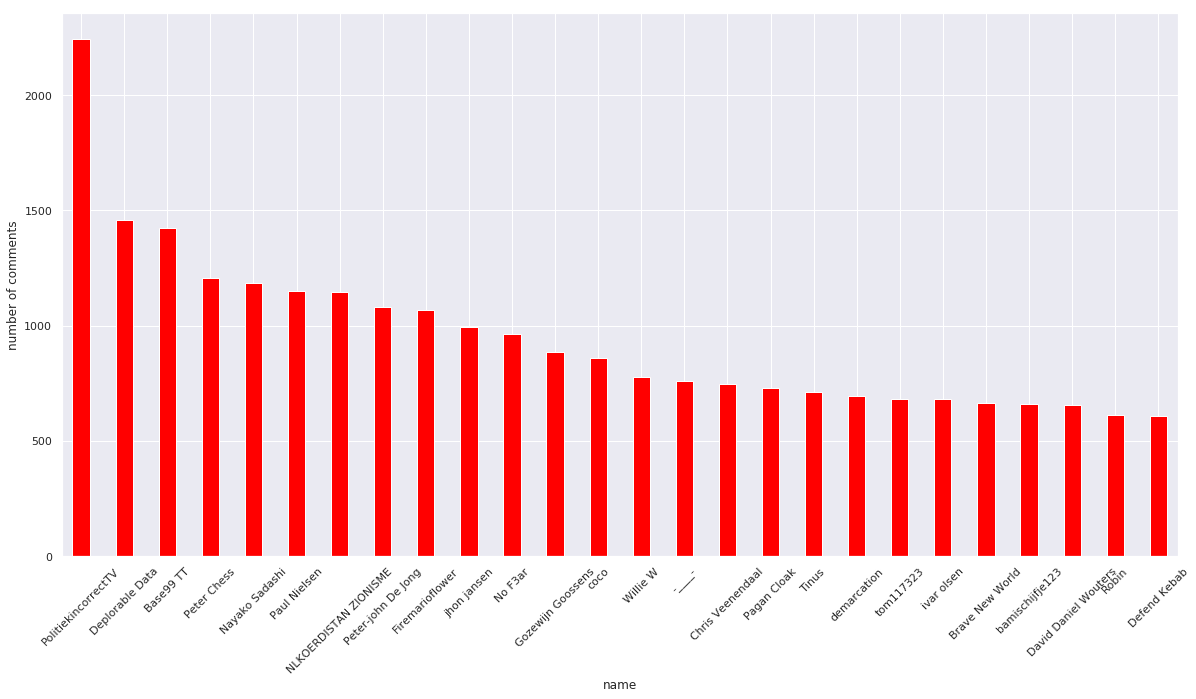

In [13]:
# Okay, we're set. Let's look at the prolific commenters first. 
# Who is commenting a lot in this network in general? 

topcommenters = nl_comment_sphere.author_display_name.value_counts()
topcommenters = topcommenters[0:26]

fig = plt.figure(figsize=(20,10)) # Create matplotlib figure

width = 0.4

ax = topcommenters.plot(kind='bar', color='red', width=width, grid=True)
ax.set_ylabel('number of comments')
ax.set_xlabel('name')
plt.xticks(rotation=45)

plt.show()

So there are some people that have commented more than 250 times in this dataset

Some observations:
* There are some channels in there that seem to actively debate with their viewers. I think it's interesting to have a look at the top two, but especially Paul Nielsen for he is affiliated with Forum voor Democratie.
* groene hond sounds familiar. I would'nt be suprised if this is the same person as 'botte hond', or 'zilte hond', a notorious social media figure.
* The names certainly don't point to real world identities. Yet.

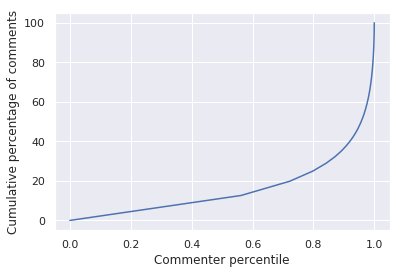

In [14]:
# Next up: a small group seems responsible for many comments. 
# Let's do an analysis of the GINI to see if that's true.

commenter_groups = nl_comment_sphere.groupby('author_channel_id') #we need these groups later.

num_comments = pd.DataFrame(commenter_groups.size().sort_values(ascending = True), columns = ['count'])
num_comments['Cumulative percentage of comments'] = 100*num_comments['count'].cumsum()/max(num_comments['count'].cumsum())
num_comments['Commenter percentile'] = num_comments.reset_index().index/max(num_comments.reset_index().index)

sns.lineplot(x=num_comments['Commenter percentile'],y=num_comments['Cumulative percentage of comments'])

del num_comments

Indeed, about 75 percent of the comments are placed by 20 percent of the commenters. And about 50 percent of the comments by about 5 percent of the commenters.

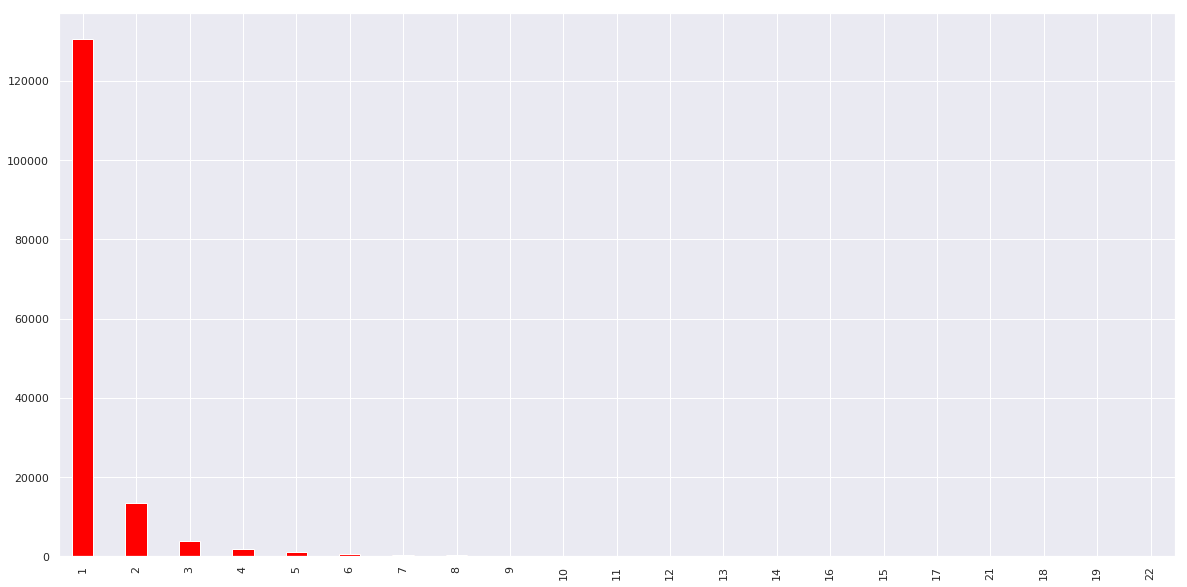

In [15]:
# Some are commenting a lot on their own channel (like Paul Nielsen). 
# Who is commenting all over the place?

prolific_commenters = commenter_groups['video_channel_title'].nunique().value_counts()

fig = plt.figure(figsize=(20,10)) # Create matplotlib figure

width = 0.4

prolific_commenters.plot(kind='bar', color='red', width=width, grid=True)
ax.set_ylabel('number of commenters')
ax.set_xlabel('number of channels')

plt.show()

By far the most commenters (35.000 plus) only comment on 1 dchannel. About 5000 comment on two channels. But we're not interested in these commenters, we want to dive into the tail of this graph, so let's start looking for commenters who are commenting on 5 or more channels.

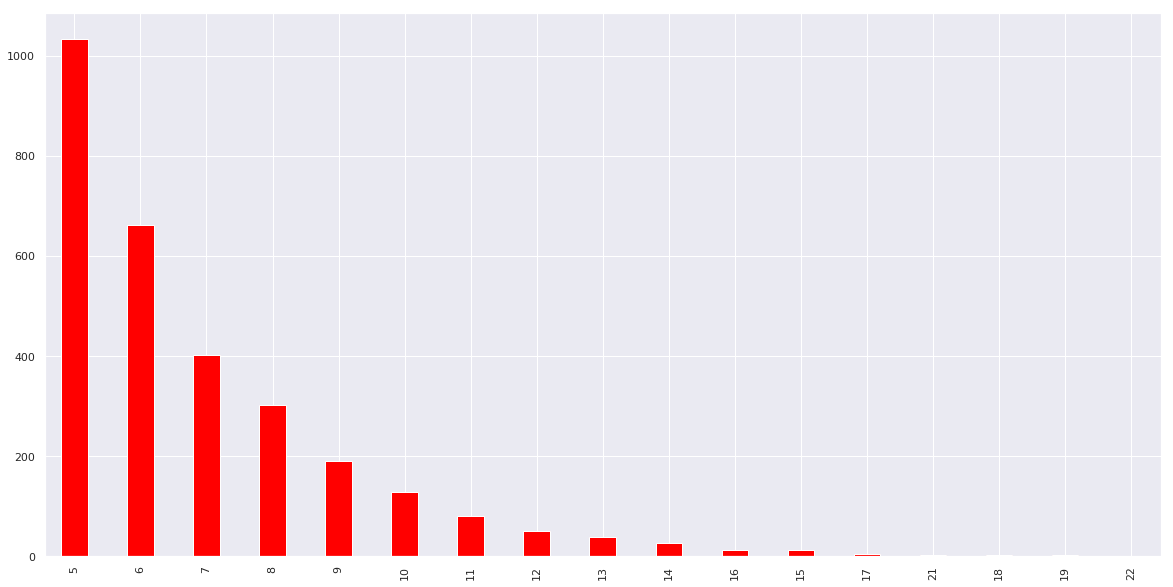

In [16]:
prolific_commenters = prolific_commenters[4:]

fig = plt.figure(figsize=(20,10)) # Create matplotlib figure

width = 0.4

prolific_commenters.plot(kind='bar', color='red', width=width, grid=True)
ax.set_ylabel('number of commenters')
ax.set_xlabel('number of channels')

plt.show()

Let's get the names of the most profilic commenters.

In [17]:
# Fill in a threshold of how many different channels someone has been commenting.

threshold = 10

prolific_commenters = nl_comment_sphere.groupby('author_channel_id') \
                    .filter(lambda x: ((x.video_channel_title.nunique() >= threshold) ))

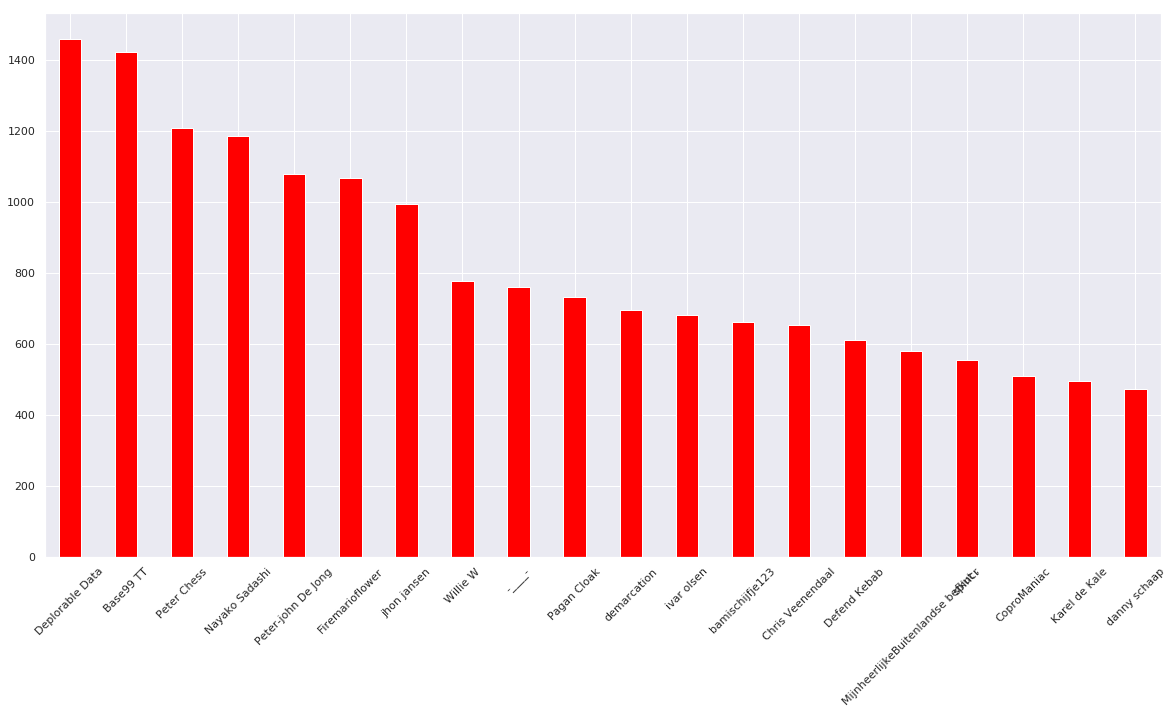

In [18]:
# Plot the most prolific commenters with the number of comments. 

prolific_commenters_to_plot = prolific_commenters.author_display_name.value_counts()
prolific_commenters_to_plot = prolific_commenters_to_plot[0:20]

fig = plt.figure(figsize=(20,10)) # Create matplotlib figure

width = 0.4

prolific_commenters_to_plot.plot(kind='bar', color='red', width=width, grid=True)
ax.set_ylabel('number of commenters')
ax.set_xlabel('number of channels')
plt.xticks(rotation=45)

plt.show()

There is a large overlap between the people who comment a lot and people who comment all over the place. The channels (like politiekincorrecttv and paul nielsen) are gone. If you want to look at the radical core of the Dutch YouTube information network, here it is. Let's explore some of them. 

### Zooming in on a couple of persons of interest in the Dutch network

In [ ]:
# Let's start with Peter Chess (would his real name be Peter Schaak?)

peter = nl_comment_sphere[nl_comment_sphere['author_display_name'] == 'Peter Chess']

It would be interesting to plot the number of comments per channel on a stacked bar chart. The x-axis is the year. The bar chart consists of channels and the height of the stacked charts the number of comments on those channels.

In [ ]:
p = peter.groupby(['video_upload_year','video_channel_title']).size().unstack()


In [ ]:
p.plot.area(figsize=(20,10))


This is still hard to read, because most of the commenting is after 2012, 2013. So let's start a bit later.

In [ ]:
p = p[p.index > 2014] #set the date from where you want the comments.

In [ ]:
p.plot.area(figsize=(20,10))

Still far from perfect, but it will do for now.

### Dutch commenters on international channels

I'm interested in exploring how these (mostly) Dutch users are represented in the larger international far right channel network. So I'll make a list of unique id's and run it through the larger corpus. First, filter out the users we need to check. These are the users in the nl_comment_sphere file. We can put these users (their unique ids into a list)

In [ ]:
users_to_check = nl_comment_sphere.author_channel_id.unique().tolist()

In [ ]:
len(users_to_check)

So now we have a list of users. Let's run them through our big right network and name the result nl_int_comment_sphere.

In [ ]:
import sys
import csv

csv.field_size_limit(sys.maxsize)

iter_csv = pd.read_csv(path_right + 'comments_right.csv', 
                       iterator=True, 
                       chunksize=100000,
                      engine='python')
nl_int_comment_sphere = pd.concat([chunk[chunk['author_channel_id'].isin(users_to_check)] for chunk in iter_csv])


In [ ]:
# How many comments do we have from people in our list?

len(nl_int_comment_sphere)

In [ ]:
nl_int_comment_sphere.author_display_name.value_counts()

I WANT TO DO A DOUBLE CHECK ON THESE DATA, FOR THERE WERE SOME PROBLEMS WITH THE COMMENTS FILE

In [ ]:
# Merge comments with video and channel data

videos_int = pd.read_csv(path_right + 'videos_right.csv', sep='\t', low_memory=False)

reaguurders = pd.merge(nl_int_comment_sphere, videos_int, on='video_id', how='left')

In [ ]:
# How many comments do we have in this new dataset?

reaguurders['year'] = pd.DatetimeIndex(reaguurders['comment_time']).year

In [ ]:
# So this is where people who comment on Dutch channels are commenting in our far right network

popular_channels_for_dutch = reaguurders.video_channel_title.value_counts()
popular_channels_for_dutch = popular_channels_for_dutch[0:20]

fig = plt.figure(figsize=(20,10)) # Create matplotlib figure

width = 0.4

popular_channels_for_dutch.plot(kind='bar', color='red', width=width, grid=True)
ax.set_ylabel('number of comments')
ax.set_xlabel('channels')
plt.xticks(rotation=45)

plt.show()

Some observations:
* Rebel Media is interesting. I didn't know it was that popular.
* Basically the usual suspects

Let's gather some more stats on the group.

In [ ]:
commenter_groups = reaguurders.groupby('author_channel_id')

In [ ]:
# Let's do another gini analysis (the results are probably the same)

num_comments = pd.DataFrame(commenter_groups.size().sort_values(ascending = True), columns = ['count'])
num_comments['Cumulative percentage of comments'] = 100*num_comments['count'].cumsum()/max(num_comments['count'].cumsum())
num_comments['Commenter percentile'] = num_comments.reset_index().index/max(num_comments.reset_index().index)

sns.lineplot(x=num_comments['Commenter percentile'],y=num_comments['Cumulative percentage of comments'])

del num_comments

This graph shows that the international Dutch comment sphere is a little bit more elitist than the Dutch one, which shouldn't suprise us. 

Take a look at the number of commenters commenting on n channels.

In [ ]:
prolific_commenters = commenter_groups['video_channel_title'].nunique().value_counts()
prolific_commenters = prolific_commenters[0:20]

fig = plt.figure(figsize=(20,10)) 

width = 0.4

prolific_commenters.plot(kind='bar', color='red', width=width, grid=True)
ax.set_ylabel('number of commenters')
ax.set_xlabel('number of channels')

plt.show()

It seems a little bit more evenly distributed. Let's look at the tail of the graph, so the really prolific commenters.

In [ ]:
prolific_commenters = commenter_groups['video_channel_title'].nunique().value_counts()
prolific_commenters = prolific_commenters[40:]

fig = plt.figure(figsize=(20,10)) 

width = 0.4

prolific_commenters.plot(kind='bar', color='red', width=width, grid=True)
ax.set_ylabel('number of commenters')
ax.set_xlabel('number of channels')

plt.plot()

These are the people that are really, really prolific, commenting on 39 channels and more. Who are these people? 

In [ ]:
# Fill in a threshold of how many different channels someone has been commenting.

threshold = 11

top_reaguurders = reaguurders.groupby('author_channel_id') \
                    .filter(lambda x: ((x.video_channel_title.nunique() >= threshold)))

In [ ]:
top_for_csv = top_reaguurders.author_display_name.unique().tolist()
df = pd.DataFrame(top_for_csv)
df.to_csv(path_right + 'temp_data/topreaguurders.csv')
top_reaguurders.author_display_name.value_counts()


Some observations:

1. These are not only Dutch people. No problem. This is something we know, because foreign people can comment on Dutch channels as well. 
2. In a previous run, with a smaller dataset I found some interesting people. For starters: carolienleiden. Might that be Caroline Dauphine from JFvD? Who knows. Identity Europa is a Dutch guy I think, connected to ID Verzet. There are a couple of Dutch guys calling themselves Pinochet I think, closely related to Erkenbrand and /polder/

Now get all the Dutch sounding names from the group we have filtered out above. In this case, everybody that has commented on Dutch channels and on 10plus channels in the international far right network. And everybody that has been commenting on 10plus channels, in total more than 150 times, in the Dutch network (if we do it less than 150 times, it's a lot of data, plus we want the frequent commenters. 150 seems a nice cut off point, but you can set the bar lower.

### Get the comments of people with dutch sounding names

In [19]:
# Some people with Dutch sounding names 
# who have commented on more than 10 channels in the international network

nl_of_interest_int = ['A Stuijt',
                    'Adrie Van Dijk',
                    'Akka Fietje',
                    'Wouter Lensvelt',
                    'Willem Sterk',
                    'Michael Groenendijk',
                    'Milo Overzicht',
                    'Mike De Jong',
                    'Mike Brink',
                    'Nellie Rutten',
                    'Paul van Dijck',
                    'Peter Jongsma',
                    'Piet Hein',
                    'Pieter van der Meer',
                    'Polder Cannabis Olie team',
                    'Politiekman',
                    'Raymond Doetjes',
                    'Willem Pasterkamp',
                    'Wimpiethe3',
                    'Willie van het Kerkhof',
                    'Vincent Vermeer',
                    'Mark Tak',
                    'Melvin Jansen',
                    'Mark Kamphuis',
                    'Tristan van Oosten',
                    'Tom dGe-lugs-pa',
                    'Tom Van de Pol',
                    'Tom Van Gool',
                    'Marcel Bruinsma',
                    'Maarten van der Poel',
                    'Maciano Van der Laan',
                    'Tiemen Weistra',
                    'TheRdamterror',
                    'TheCitroenman1',
                    'The flying dutchman',
                    'Teun de Heer',
                    'Stijn van de Ven',
                    'Sjaak v Koten',
                    'Sev Vermeer',
                    'Tanya De Beer',
                    'Tim Pietersen',
                    'Alan Holland',
                    'Bennie Leip',
                    'Bert Prins',
                    'Bestheftig',
                    'Borisje Boef',
                    'Chris Van Bekkum',
                    'Coen Bijpost',
                    'Cornelis van der Heijden',
                    'David Teunissen',
                    'David Van der Tweel',
                    'De Veelvraat',
                    'Dennis Bouma',
                    'Dennis Eijs',
                    'Donald gekkehenkie',
                    'peter van',
                    'onbekende telefoon',
                    'nick van achthoven',
                    'mikedehoogh black flag race photos',
                    'kristof verbruggen',
                    'jan holdijk',
                    'jan Yup',
                    'iwan munnikes',
                    'hans van de mortel',
                    'geroestetumor',
                    'geheimschriver',
                    'gaatje niksaan',
                    'dutchmountainsnake',
                    'dutch menneer',
                    'donder bliksem',
                    'boereriem',
                    'appie D',
                    'adam willems',
                    'Yuri Klaver',
                     'zuigdoos',
                    'yvonneforsmanatyahoo',
                    'vanhetgoor',
                    'theflyingdutchboi',
                    'r juttemeijer',
                    'rutger houtdijk',
                    'Dutch Patriot',
                    'Dutch Whitey',
                    'DutchFurnace',
                    'Esias Lubbe',
                    'Ewalds Eiland',
                    'Joey Kuijs',
                    'Faust',
                    'Hollandia777',
                    'Johan van Oldenbarnevelt',
                    'Keescanadees',
                    'Geert Kok',
                    'Haasenpad',
                    'Henk Damster',
                    'Henk van der Laak',
                    'Henri Zwols',
                    'Haat Praat',
                    'Gerard Mulder',    
                    'Grootmeester Jan',
                    'H. v. Heeswijk',
                    'B. Hagen',
                    '1234Daan4321',
                    'Daniella Thoelen', 
                    'Diederik',
                    'Linda Bostoen', 
                    'Christiaan Baron', 
                    'Matthijs van Guilder',
                    'Johannes Roose',
                    'Deon Van der Westhuizen', 
                    'Remko Jerphanion', 
                    'Roosje Keizer',
                    'Dennis Durkop',
                    'ivar olsen',
                    'Pete de pad',
                    'georgio jansen',
                    'Joel Peter',
                    'Antonie de Vry',
                    'Stijn Voorhoeve', 
                    'liefhebber179',
                    'Walter Taljaard',
                    'joe van gogh',
                    'Edo Peter', 
                    'Ad Lockhorst',
                    'kay hoorn',
                    'Erik Bottema',
                    'Deplorable Data',
                    'JESSEverything',
                    'Harry Balzak', 
                    'Bokkepruiker Records',
                    'zonnekat',
                    'Peter-john De Jong',
                    'marco mac',
                    'Joubert x',
                    'Natasja van Dijk',
                    'Voornaam Achternaam',
                    'hermanPla', 
                    'M. van der Scheer',
                    'gerald polyak',
                    'Robbie Retro',
                    'Johannes DeMoravia',
                    'Wouter Vos',
                    'AwoudeX',
                    'carolineleiden',
                    'A-dutch-Z',
                    'piet ikke',
                    'kutbleat',
                    'David of Yorkshire',
                    'Gert Tjildsen',
                    'Flying Dutchman',
                    'Visko Van Der Merwe',
                    'Blobbejaan Blob',
                    'TheBergbok',
                    'jknochel76',
                    'Olleke Bolleke'
                    ]

# And top n from nl_most prolific commenters (on 10 Dutch channels or more, with 150 comments or more)

nl_of_interest_nl = ['Nayako Sadashi', 'demarcation'  
                    'er zaal',
                    'jhon jansen',
                    '-____-',
                    'Brummie Brink',
                    'reindeerkid ',
                    'Pagan Cloak',
                    'NDY',
                    'Karel de Kale',
                    'top top',
                    'Chris Veenendaal ',
                    'MijnheerlijkeBuitenlandse befkut ,',
                    'Kevin Zilverberg',
                    'Rick Dekker ',
                    'Adrie Van Dijk ',
                    'miep miep',
                    'pronto ',
                    'TheUnTrustable0',
                    'danny schaap',
                    'Mark Mathieu',
                    'Raysboss302',
                    'Ruud Hooreman',
                    'Willie W',
                    'Barend Borrelworst',
                    'theo breytenbach',
                     'coinmaster1000 coinmaster1000'  ]

In [28]:
reaguurders = nl_of_interest_int + nl_of_interest_nl
len(reaguurders)

179

In [21]:
# Lookup people in right infosphere

iter_csv = pd.read_csv(path_nl + 'comments_nl_right.csv', 
                        iterator=True, 
                        chunksize=100000,
                        sep='¶',
                        quotechar='þ',
                        engine='python')
reaguurders_nl = pd.concat([chunk[chunk['author_display_name'].isin(reaguurders)] for chunk in iter_csv])


In [23]:
reaguurders_nl_vid = pd.merge(reaguurders_nl, videos, on='video_id', how='left')

In [26]:
reaguurders_nl_vid['sphere'] = 'nl_right'

In [27]:
# Then look these people up in the right infosphere

iter_csv = pd.read_csv(path_right + 'comments_right.csv', 
                        iterator=True, 
                        chunksize=100000,
                        sep='¶',
                        quotechar='þ',
                        engine='python')
reaguurders_right = pd.concat([chunk[chunk['author_display_name'].isin(reaguurders)] for chunk in iter_csv])


In [39]:
videos_right = pd.read_csv(path_right + 'videos_right.csv', encoding='latin-1')

reaguurders_right_vid = pd.merge(reaguurders_right, videos, on='video_id', how='left')
reaguurders_right_vid['sphere'] = 'int_right'
len(reaguurders_right_vid)


35185

In [31]:
# Finally in the left infosphere

iter_csv = pd.read_csv(path_left + 'comments_left.csv', 
                        iterator=True, 
                        chunksize=100000,
                        sep='¶',
                        quotechar='þ',
                        engine='python')
reaguurders_left = pd.concat([chunk[chunk['author_display_name'].isin(reaguurders)] for chunk in iter_csv])


In [40]:
videos_left = pd.read_csv(path_left + 'videos_left.csv', encoding='latin-1')

reaguurders_left_vid = pd.merge(reaguurders_left, videos, on='video_id', how='left')
reaguurders_left_vid['sphere'] = 'int_left'

len(reaguurders_left_vid)

14251

In [41]:
# And bring it all together

reaguurders = reaguurders_nl_vid.append([reaguurders_right_vid, reaguurders_left_vid], sort=False)

In [42]:
len(reaguurders)

71269

In [43]:
reaguurders.to_csv('output/nl_reaguurders_op_meer_dan_tien_kanalen.csv')

In [47]:
reaguurders

,video_id,comment_id,author_display_name,author_channel_url,author_channel_id,comment_text,comment_like_count,comment_dislike_count,comment_time,reply_count,...,video_default_language,video_duration,video_view_count,video_comment_count,video_likes_count,video_dislikes_count,video_topic_ids,video_topic_categories,sphere,Unnamed: 0
0,oR-2MKZSWpM,UgwI7Tr7Vt20AoqOyE94AaABAg.8kUTSGP4Fdk8kUnpl0HL8i,De Veelvraat,http://www.youtube.com/channel/UChs_BUCAync1dX...,UChs_BUCAync1dXC5KDXYY-g,"Yep, that is the stance of most now. Changed a...",0,NaN,2018-08-28T11:05:34.000Z,NaN,...,not set,PT13M31S,474.0,6.0,29.0,1.0,"['/m/098wr', '/m/098wr', '/m/0f2f9']",['https://en.wikipedia.org/wiki/Television_pro...,nl_right,NaN
1,al-fqIl8siU,UgwbxBxewtIidSdvT0V4AaABAg,Mark Kamphuis,http://www.youtube.com/channel/UCYET2mmnK3o54C...,UCYET2mmnK3o54CqQa1M2hww,Klinkt goed,0,0,2018-08-04T11:06:23.000Z,0,...,not set,PT8M8S,195.0,4.0,18.0,0.0,not set,not set,nl_right,NaN
2,kLEjNFnebzU,UgwvONH3lZOXkDYZxqJ4AaABAg,David Van der Tweel,http://www.youtube.com/channel/UClRkElZ5OM8Vt6...,UClRkElZ5OM8Vt6n-elXelTQ,Goede video.,2,0,2018-07-15T17:17:11.000Z,0,...,not set,PT10M20S,347.0,3.0,21.0,2.0,"['/m/04rlf', '/m/04rlf']",['https://en.wikipedia.org/wiki/Music'],nl_right,NaN
3,SqZV05BKR6A,UgyG_bVgAGcDbHb8uTN4AaABAg,Mark Kamphuis,http://www.youtube.com/channel/UCYET2mmnK3o54C...,UCYET2mmnK3o54CqQa1M2hww,Was Nederlands niet heel erg beïnvloed door he...,0,0,2018-06-14T08:29:42.000Z,1,...,not set,PT14M56S,483.0,26.0,23.0,0.0,"['/m/04rlf', '/m/04rlf']",['https://en.wikipedia.org/wiki/Music'],nl_right,NaN
4,SqZV05BKR6A,UgzVJKC_chKyUbwWRgB4AaABAg,kay hoorn,http://www.youtube.com/channel/UCXJTXvf7RRscEt...,UCXJTXvf7RRscEt3pEySkfqA,Jammer dat Zonwending&#39;s kanaal is geblokke...,0,0,2018-05-04T23:02:42.000Z,1,...,not set,PT14M56S,483.0,26.0,23.0,0.0,"['/m/04rlf', '/m/04rlf']",['https://en.wikipedia.org/wiki/Music'],nl_right,NaN
5,SqZV05BKR6A,UgxW5h6yx-RhcS_shul4AaABAg,Diederik,http://www.youtube.com/channel/UCXenEP1_1GRTII...,UCXenEP1_1GRTIInbG9xhdpQ,Interessante vraag. Ik vind het antwoord dat &...,2,0,2018-05-04T14:56:57.000Z,2,...,not set,PT14M56S,483.0,26.0,23.0,0.0,"['/m/04rlf', '/m/04rlf']",['https://en.wikipedia.org/wiki/Music'],nl_right,NaN
6,SqZV05BKR6A,UgxW5h6yx-RhcS_shul4AaABAg.8fpX5qhhad-8fpmW7WWDZP,Diederik,http://www.youtube.com/channel/UCXenEP1_1GRTII...,UCXenEP1_1GRTIInbG9xhdpQ,Erkenbrand stelt op de site &quot;Wij hebben g...,0,NaN,2018-05-04T17:20:20.000Z,NaN,...,not set,PT14M56S,483.0,26.0,23.0,0.0,"['/m/04rlf', '/m/04rlf']",['https://en.wikipedia.org/wiki/Music'],nl_right,NaN
7,NVTm-02tRwQ,UgyaA5hJv45A6w--Hid4AaABAg,kay hoorn,http://www.youtube.com/channel/UCXJTXvf7RRscEt...,UCXJTXvf7RRscEt3pEySkfqA,The great replacement. 14,4,0,2018-04-17T22:12:39.000Z,0,...,not set,PT10M38S,664.0,7.0,34.0,4.0,['/m/04rlf'],['https://en.wikipedia.org/wiki/Music'],nl_right,NaN
8,I9hoX6p0hdk,Ugznlq_9GXw1ez85CmZ4AaABAg,kay hoorn,http://www.youtube.com/channel/UCXJTXvf7RRscEt...,UCXJTXvf7RRscEt3pEySkfqA,Doomsday preppen is nutteloos zolang je geen w...,2,0,2018-03-27T11:41:32.000Z,2,...,not set,PT7M31S,522.0,18.0,25.0,1.0,"['/m/04rlf', '/m/04rlf']",['https://en.wikipedia.org/wiki/Music'],nl_right,NaN
9,v9DyYioU0vA,UgzBZ8uE89UPRYiHxvV4AaABAg,kay hoorn,http://www.youtube.com/channel/UCXJTXvf7RRscEt...,UCXJTXvf7RRscEt3pEySkfqA,We zijn de draad helemaal kwijt geraakt in ons...,4,0,2018-03-12T22:17:30.000Z,0,...,not set,PT7M34S,616.0,11.0,40.0,4.0,"['/m/098wr', '/m/098wr']",['https://en.wikipedia.org/wiki/Society'],nl_right,NaN


OR Let's explore some people here.

In [ ]:
nl_reaguurders = reaguurders[reaguurders['author_display_name'].isin(nl_of_interest_int)]
len(nl_reaguurders)

So these are the Dutch people, for now, that can be considered quite active on YouTube, as in that they have commented a lot on many (more then 10) different channels).

In [ ]:
nl_reaguurders.author_display_name.value_counts()

Let's explore a couple of them in detail, especially their journey on YouTube.

In [ ]:
wouter = nl_reaguurders[nl_reaguurders['author_display_name'] == 'Wouter Vos']

And let's try an area chart.

In [ ]:
w = wouter.groupby(['year','video_channel_title']).size().unstack()
w.plot.area(figsize=(20,10))

In [ ]:
w = w[w.index > float(2016)]

In [ ]:
w.plot.area(figsize=(20,10))

It's probably better to export the data and have a look at them in [RAWGraphs](http://app.rawgraphs.io/), for instance, in the bump charts

In [ ]:
w = wouter.groupby(['year','video_channel_title']).size()

w.to_csv(path_nl + 'temp_data/for_raw_graph_woutervos.csv')

In [ ]:
natasja = nl_reaguurders[nl_reaguurders['author_display_name'] == 'Natasja van Dijk']

In [ ]:
n = natasja.groupby(['year','video_channel_title']).size()

n.to_csv(path_nl + 'temp_data/for_raw_graph_natasja_van_dijk.csv')

In [ ]:
# And prepare data for a bump chart for the whole group

for_raw = nl_reaguurders.groupby(['year','video_channel_title']).size()

for_raw.to_csv(path_nl + 'temp_data/for_raw_graph_nl_reaguurders.csv')

### Look at the right-wing commenters*  on left wing channels

\*To be fair, we cannot say for certain that the commenters here are right-wing commenters. They could also be left wing or from another political background, but active on these right-wing channels).

In [ ]:
reaguurders_to_check = nl_comment_sphere.author_channel_id.unique().tolist()

In [ ]:
import sys
import csv

csv.field_size_limit(sys.maxsize)


iter_csv = pd.read_csv(path_left + 'comments_left.csv', 
                       iterator=True, 
                       chunksize=100000,
                       sep='\t',
                      engine='python')
nl_reaguurders_on_left = pd.concat([chunk[chunk['author_channel_id'].isin(reaguurders_to_check)] for chunk in iter_csv])
len(nl_reaguurders_on_left)

In [ ]:
nl_reaguurders_on_left.columns

In [ ]:
videos = pd.read_csv(path_left + 'videos_left.csv', sep='\t')
nl_commentsphere_left = pd.merge(nl_reaguurders_on_left, videos, on='video_id', how='left')

In [ ]:
len(nl_commentsphere_left)

In [ ]:
nl_commentsphere_left.video_channel_title.value_counts()

### TODO: Follow commenter journeys

Okay, let's try something more difficult and follow the commenter's journeys and put that data into a graph. I'll take the prolific commenters as a starting point (start small because this is very memory intensive)

TOT 2.3 IS HET NOG WAT PROBEERSELS EN TROEP. DUS SLA DIT EVEN OVER.

In [ ]:
# let's zoom in on some channels

channel = 'Millennial Woes' #enter the channel name

comments_of_interest = int_vid_comments[int_vid_comments['video_channel_title'] == channel]

comments_of_interest

My impression is that the data are skewed because of Voice of Europe. We can collect more specific data if we want. Let's select one or more Dutch channels first.

## Question #3: Comparisson

Make some comparissons with other information networks, starting with political parties.

Load data from control group

We want to compare the results from the NL right information network with other networks. For instance, we want to compare the behavior of certain political parties (in the Netherlands Forum voor Democratie and the PVV) with centre and left wing parties.

TODO: make a list of relevant control channels. At least PvdD, SP, DENK, PvdA, D66, GroenLinks, ChristenUnie, VVD, CDA. Other candidates: Zondag met Lubach, De Nieuwe Maan, ???

In [ ]:
# Import channels

channels_control = pd.read_csv(path_nl + 'controlegroep/channels_nl_controlegroep_politiek.csv')

# Import videos

videos_control = pd.read_csv(path_nl + 'controlegroep/videos_nl_controlegroep_politiek.csv')

#import comments:

comments_control = pd.read_csv(path_nl + 'controlegroep/comments_nl_controlegroep.csv')

#import recommendations:

recs_control = pd.read_csv(path_nl + 'controlegroep/recommendations_nl_controlegroep.csv')

#import transcripts still TODO:

In [ ]:
# Get channel and video data from PVV and FvD

channel1 = 'Forum Democratie' #fill in the channels you want to compare
channel2 = 'PVVpers'

pvvfvd_vids = videos.loc[(videos['video_channel_title'] == channel1) | \
                      (videos['video_channel_title'] == channel2)
                     ]

In [ ]:
pvvfvd_channels = channels.loc[(channels['channel_title'] == channel1) | \
                      (channels['channel_title'] == channel2)
                     ]

In [ ]:
compare_channels = channels_control.append(pvvfvd_channels)

In [ ]:
compare_vids = videos_control.append(pvvfvd_vids, sort=True)

In [ ]:
compare_vids['video_upload_year'] = pd.DatetimeIndex(compare_vids['video_published']).year

In [ ]:
# Time to plot some stuff

ax = compare_vids.groupby(['video_upload_year','video_channel_title'])['video_channel_title'] \
        .count().unstack(1).plot.line(title="Number of uploaded videos per party", figsize=(20,10), grid=True)

ax.set_xlabel('year')
ax.set_ylabel('number of uploads')

plt.show()

# Show the number of uploads per year. I chose a line chart here, because the bar chart is really unclear.
# The data are of course discrete and not continuous. 

In [ ]:
views_per_year = compare_vids.groupby(['video_upload_year'])['video_view_count'].agg('sum')

fig = plt.figure(figsize=(10,5)) # Create matplotlib figure

width = 0.4

views_per_year.plot(kind='bar', color='red', width=width, grid=True)
ax.set_ylabel('number of videos published')
ax.set_xlabel('year')

plt.show()

# Show the number of views combined per year.

In [ ]:
ax = compare_vids.groupby(['video_upload_year','video_channel_title'])['video_view_count'] \
        .agg('sum') \
        .unstack(1) \
        .plot \
        .line(title="Number of views per party", 
            figsize=(20,10), 
            grid=True)

ax.set_xlabel('year')
ax.set_ylabel('number of views')

plt.show()

It's bit of a mess, but it is way clear that Forum Democratie is outperforming everybody. Maybe it's better to make some decisions on what to show.

In [ ]:
compare_vids = videos_control.append(pvvfvd_vids, sort=True)
compare_vids['video_upload_year'] = pd.DatetimeIndex(compare_vids['video_published']).year

channels_we_want = ['Forum Democratie', 'Partij van de Arbeid (PvdA)', 'PVVpers', 'DENK TV', 'GroenLinks']

compare_vids = compare_vids[compare_vids.video_channel_title.isin(channels_we_want)]

In [ ]:
ax = compare_vids.groupby(['video_upload_year','video_channel_title'])['video_view_count'] \
        .agg('sum').unstack(1).plot.line(title="Number of views per party", figsize=(20,10), grid=True)

ax.set_xlabel('year')
ax.set_ylabel('number of views')

plt.show()